In [1]:
# imported nana tanan ayaw na pag import pisti yawa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats


BASIC DESCRIPTIVE STATISTICS


In [40]:
# Load the uploaded file
file_path = '202408_CombinedData.csv'

# Load the data
data = pd.read_csv(file_path)
df = pd.DataFrame(data)

# Filter for the top 20 major cities in the Philippines
major_cities = [
    'Manila', 'Quezon City', 'Cebu City', 'Davao City', 'Makati', 'Taguig', 'Pasig',
    'Meycauyan', 'Mandaluyong', 'Caloocan', 'Las Piñas', 'Calamba', 'Parañaque',
    'Baguio City', 'Angeles City', 'Iloilo City', 'Cagayan de Oro', 'Zamboanga City',
    'Bacolod', 'Antipolo'
]

# Filter the data for these cities
filtered_data = data[data['city_name'].isin(major_cities)].copy()
#"""
# Log transformation
constant = 1  # To avoid log(0)
log_columns = ['main.aqi', 'components.co', 'components.no', 'components.o3', 
               'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3']

# Apply log transformation
for column in log_columns:
    filtered_data[column] = np.log(filtered_data[column] + constant)

#"""
# Summary statistics for the filtered data
summary_stats = filtered_data[log_columns + ['city_name']].describe()

# Output the statistics
summary_stats


,main.aqi,components.co,components.no,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
count,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,1.048942,6.323891,0.660289,2.747096,1.725941,2.545045,2.814271,1.680708
std,0.400210,0.693347,1.045853,1.369847,1.050537,1.249019,1.209045,0.837603
min,0.693147,5.361057,0.000000,0.000000,0.058269,0.405465,0.559616,0.000000
25%,0.693147,5.772811,0.019803,2.164749,0.908259,1.504632,1.848848,1.054312
50%,1.098612,6.120188,0.157004,3.045950,1.521699,2.350899,2.638700,1.610433
75%,1.386294,6.735946,0.735965,3.661251,2.509590,3.533687,3.727979,2.301585
max,1.791759,8.542461,4.851718,5.841571,4.843321,5.708140,5.780342,4.038303


In [41]:
# Rename columns for readability
filtered_data = filtered_data.rename(columns={
    'main.aqi': 'AQI',
    'components.co': 'Carbon Monoxide (CO)',
    'components.no': 'Nitric Oxide (NO)',
    'components.no2': 'Nitrogen Dioxide (NO₂)',
    'components.o3': 'Ozone (O₃)',
    'components.so2': 'Sulfur Dioxide (SO₂)',
    'components.pm2_5': 'PM2.5',
    'components.pm10': 'PM10',
    'components.nh3': 'Ammonia (NH₃)'
})

# Columns with readable chemical names
chemical_columns_readable = ['AQI', 'Carbon Monoxide (CO)', 'Nitric Oxide (NO)',
                             'Nitrogen Dioxide (NO₂)', 'Ozone (O₃)', 'Sulfur Dioxide (SO₂)',
                             'PM2.5', 'PM10', 'Ammonia (NH₃)']

# Dictionary to store statistics with readable names
statistics_readable = {}

# Calculating descriptive statistics for each readable chemical column
for column in chemical_columns_readable:
    column_data = filtered_data[column].dropna()

    # Ensure mode is always treated as an array
    mode_result = stats.mode(column_data, nan_policy='omit')
    mode_value = np.atleast_1d(mode_result.mode)[0] if mode_result.mode.size > 0 else np.nan

    # Compile statistics for each column
    stats_dict = {
        'mean': np.mean(column_data),
        'median': np.median(column_data),
        'mode': mode_value,
        'std_dev': np.std(column_data, ddof=1),
        'variance': np.var(column_data, ddof=1),
        'min': np.min(column_data),
        'max': np.max(column_data),
        'range': np.ptp(column_data),
        '25th_percentile': np.percentile(column_data, 25),
        '50th_percentile': np.percentile(column_data, 50),
        '75th_percentile': np.percentile(column_data, 75)
    }
    statistics_readable[column] = stats_dict

# Convert the statistics dictionary into a DataFrame for better visualization
statistics_readable_df = pd.DataFrame(statistics_readable).T

# Display the statistics DataFrame with readable chemical names
statistics_readable_df

,mean,median,mode,std_dev,variance,min,max,range,25th_percentile,50th_percentile,75th_percentile
AQI,1.048942,1.098612,0.693147,0.400210,0.160168,0.693147,1.791759,1.098612,0.693147,1.098612,1.386294
Carbon Monoxide (CO),6.323891,6.120188,5.603483,0.693347,0.480731,5.361057,8.542461,3.181404,5.772811,6.120188,6.735946
Nitric Oxide (NO),0.660289,0.157004,0.000000,1.045853,1.093808,0.000000,4.851718,4.851718,0.019803,0.157004,0.735965
Nitrogen Dioxide (NO₂),15.277169,8.910000,6.600000,18.534413,343.524453,0.160000,148.060000,147.900000,3.560000,8.910000,19.360000
Ozone (O₃),2.747096,3.045950,0.000000,1.369847,1.876481,0.000000,5.841571,5.841571,2.164749,3.045950,3.661251
Sulfur Dioxide (SO₂),1.725941,1.521699,1.261298,1.050537,1.103628,0.058269,4.843321,4.785052,0.908259,1.521699,2.509590
PM2.5,2.545045,2.350899,0.615186,1.249019,1.560048,0.405465,5.708140,5.302675,1.504632,2.350899,3.533687
PM10,2.814271,2.638700,2.361797,1.209045,1.461791,0.559616,5.780342,5.220726,1.848848,2.638700,3.727979
Ammonia (NH₃),1.680708,1.610433,1.381282,0.837603,0.701578,0.000000,4.038303,4.038303,1.054312,1.610433,2.301585


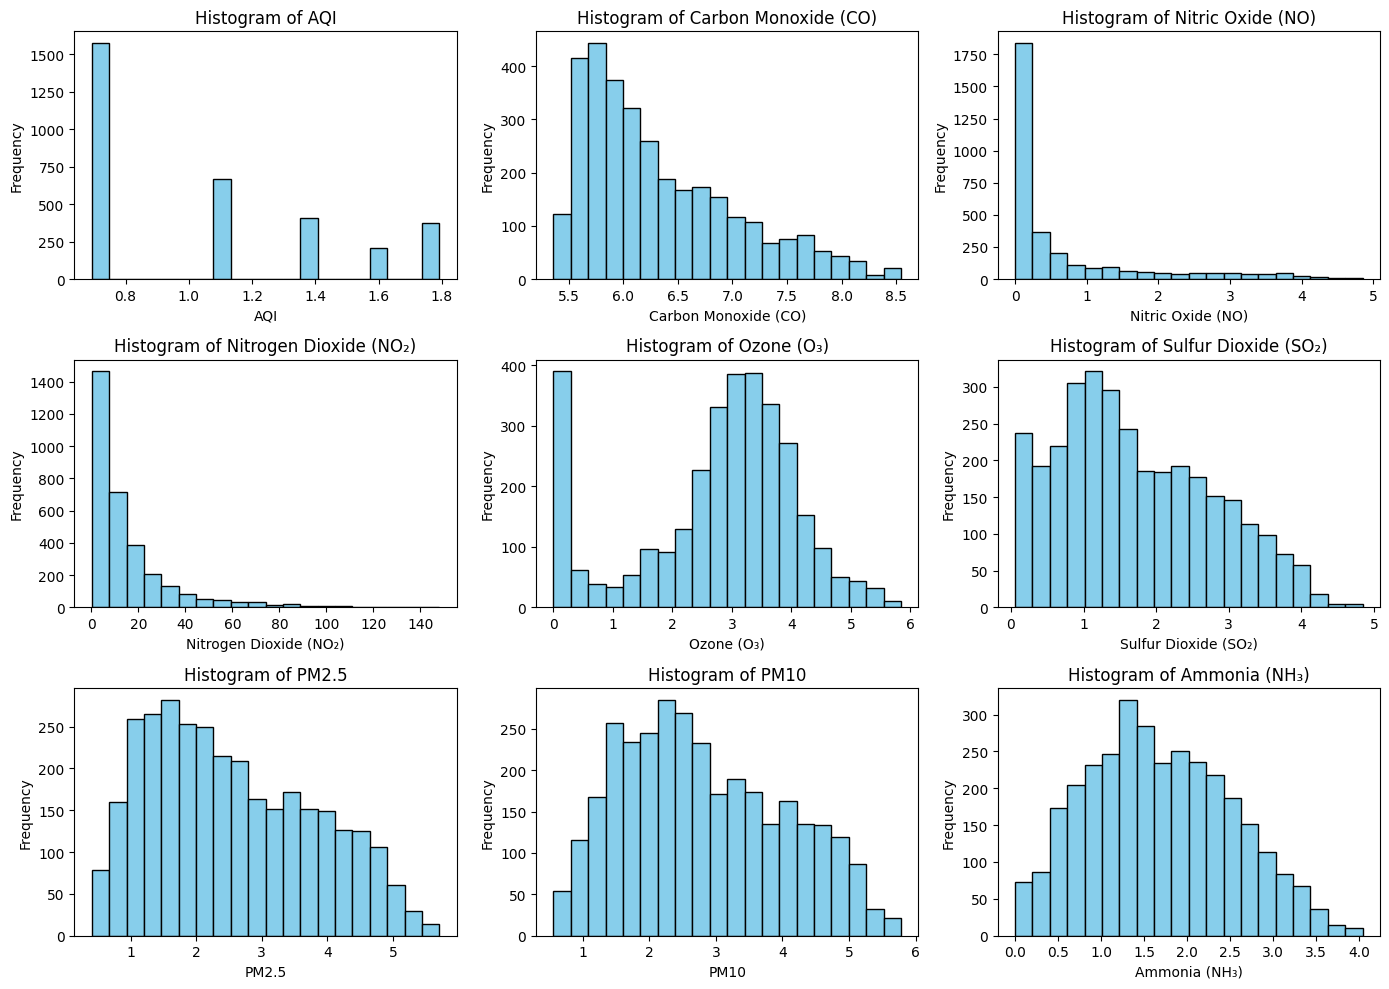

In [26]:
# Visual Presentation: Histogram for each chemical component
plt.figure(figsize=(14, 10))
for i, column in enumerate(chemical_columns_readable, 1):
    plt.subplot(3, 3, i)
    plt.hist(filtered_data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

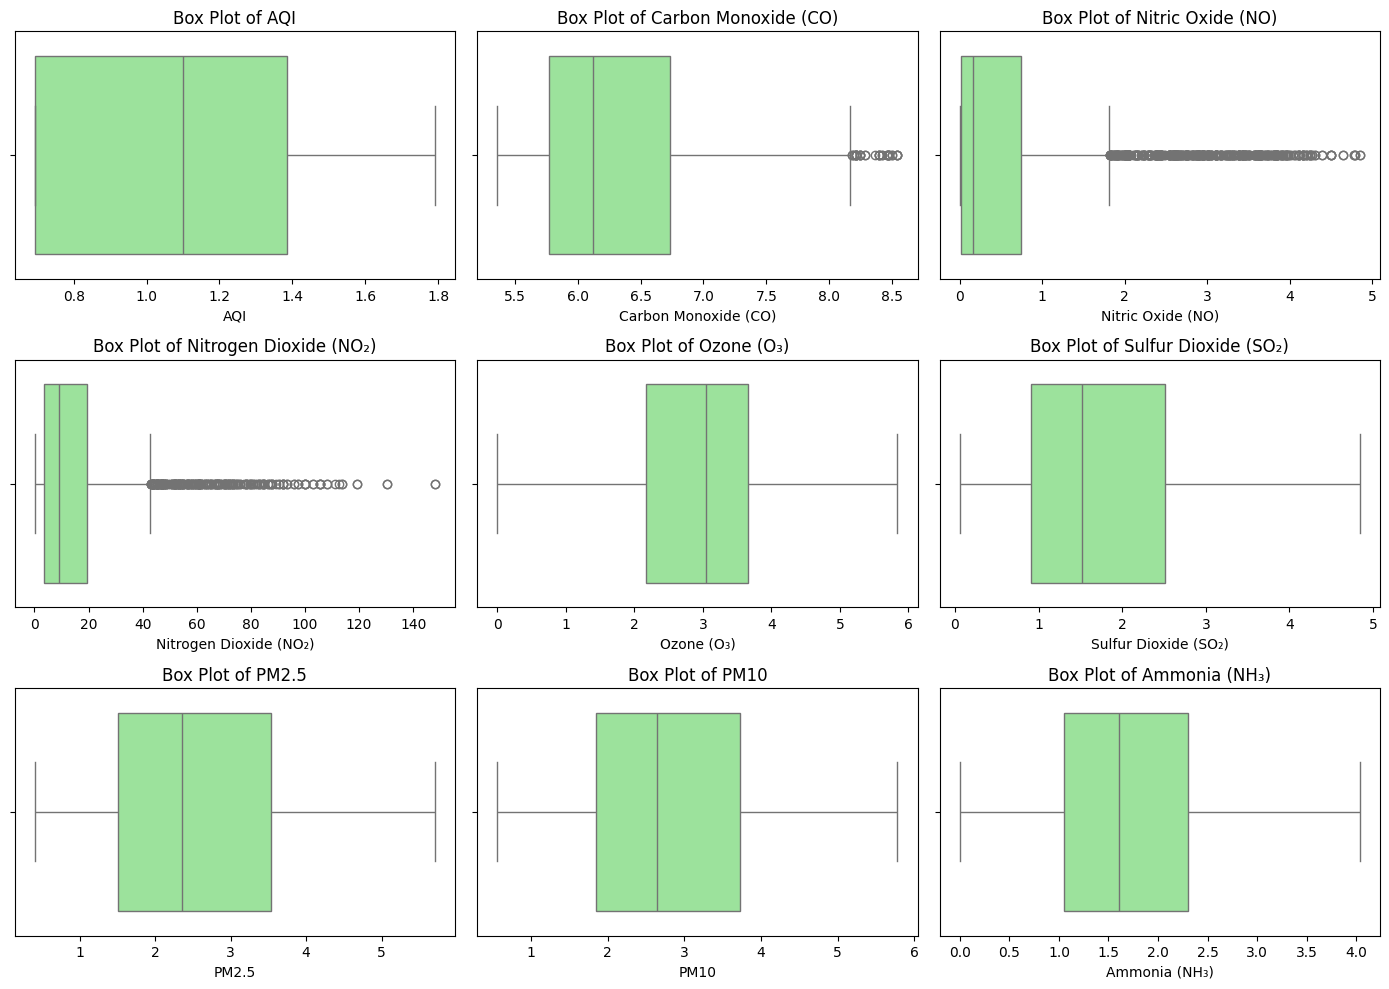

In [27]:
# Visual Presentation: Boxplot for each chemical component
plt.figure(figsize=(14, 10))
for i, column in enumerate(chemical_columns_readable, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=filtered_data[column].dropna(), color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

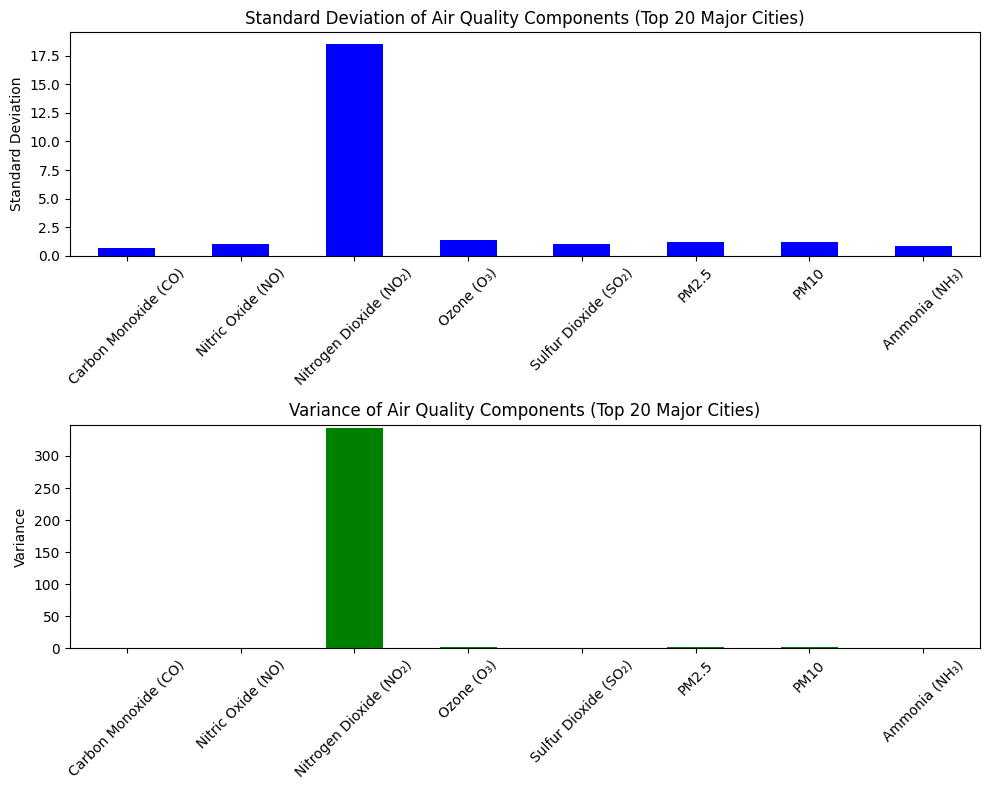

In [50]:
# Load the data
file_path = '202408_CombinedData.csv'
data = pd.read_csv(file_path)

# Columns to analyze
all_columns_to_analyze = ['Carbon Monoxide (CO)', 'Nitric Oxide (NO)', 'Nitrogen Dioxide (NO₂)',
                           'Ozone (O₃)', 'Sulfur Dioxide (SO₂)', 'PM2.5', 'PM10', 'Ammonia (NH₃)']

# Calculate standard deviations and variances for the selected columns
std_devs_all = filtered_data[all_columns_to_analyze].std()
variances_all = filtered_data[all_columns_to_analyze].var()
# Create bar plots for standard deviation and variance for all components
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Standard Deviation Plot for all components
std_devs_all.plot.bar(ax=axes[0], color='blue')
axes[0].set_title('Standard Deviation of Air Quality Components (Top 20 Major Cities)')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_ylim(0, std_devs_all.max() + 1) 
axes[0].tick_params(axis='x', rotation=45)

# Variance Plot for all components
variances_all.plot.bar(ax=axes[1], color='green')
axes[1].set_title('Variance of Air Quality Components (Top 20 Major Cities)')
axes[1].set_ylabel('Variance')
axes[1].set_ylim(0, variances_all.max() + 5) 
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


IDENTIFYING POLLUTION SOURCES BASED ON SPIKES IN SPECIFIC POLLUTANTS

What are Spikes?
In the context of air quality, a "spike" refers to a sudden increase in the concentration of a specific pollutant that exceeds normal levels. These spikes often indicate an event where pollution levels are unusually high, which can be attributed to specific sources or activities (e.g., industrial emissions, traffic congestion, etc.).

Visualizing Frequent Spikes:
Once spikes are detected, you can count how often each pollutant exceeds its threshold. This helps identify which pollutants experience frequent spikes, indicating potential air quality issues that may be linked to specific sources (e.g., traffic, industrial plants).


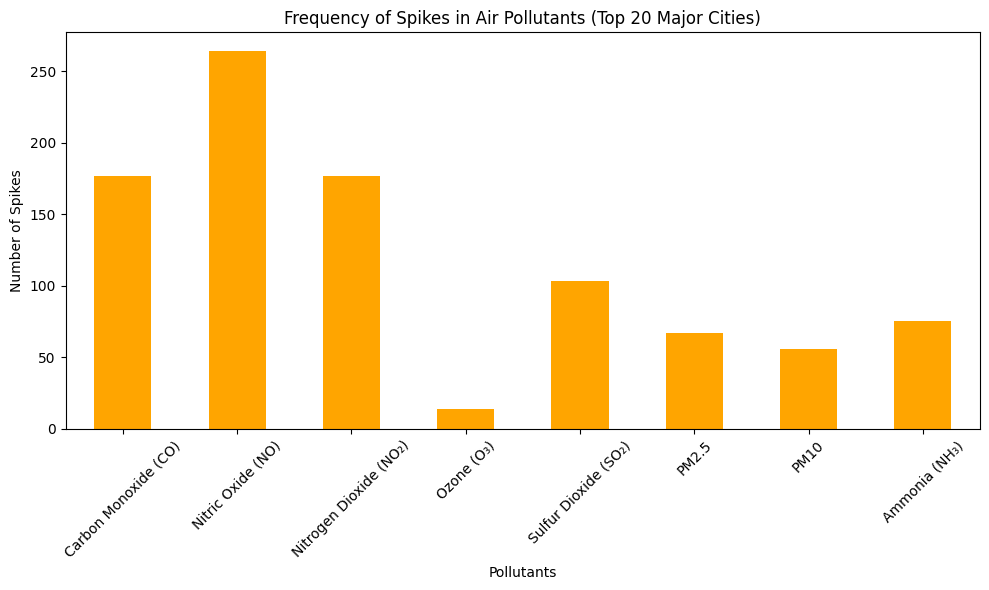

In [49]:
# Columns to analyze
pollutants = ['Carbon Monoxide (CO)','Nitric Oxide (NO)', 'Nitrogen Dioxide (NO₂)', 'Ozone (O₃)',
              'Sulfur Dioxide (SO₂)', 'PM2.5', 'PM10', 'Ammonia (NH₃)']

# Calculate the mean and standard deviation for each pollutant
mean_vals = filtered_data[pollutants].mean()
std_vals = filtered_data[pollutants].std()

# Set threshold for spikes: 2 standard deviations above the mean
thresholds = mean_vals + 2 * std_vals

# Identify rows where any pollutant exceeds its spike threshold
spikes = filtered_data[(filtered_data[pollutants] > thresholds).any(axis=1)]

# Count how often each pollutant spikes to assess 'frequent' pollutants
spike_counts = (spikes[pollutants] > thresholds).sum()

# Plot spike counts to visualize which pollutants spike more frequently
spike_counts.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Frequency of Spikes in Air Pollutants (Top 20 Major Cities)')
plt.ylabel('Number of Spikes')
plt.xlabel('Pollutants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


COMPARING AIR QUALITY ACROSS THE 20 MAJOR CITIES


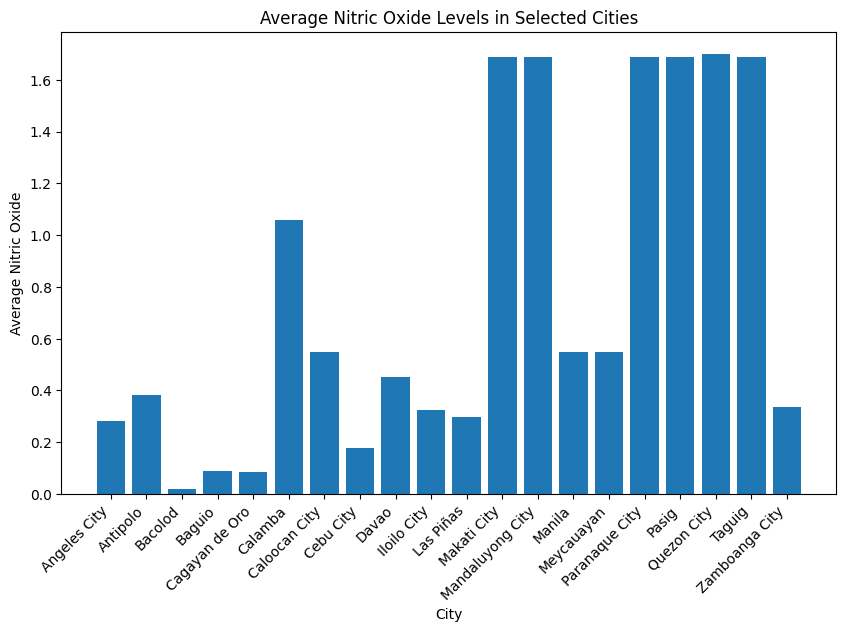

In [56]:
desired_cities = ["Manila", "Quezon City", "Cebu City",
                  "Davao", "Makati City", "Taguig", "Pasig", "Calamba",
                  "Mandaluyong City", "Caloocan City", "Las Piñas", "Meycauayan",
                  "Paranaque City", "Baguio", "Angeles City", "Iloilo City",
                  "Cagayan de Oro", "Zamboanga City", "Bacolod", "Antipolo"]

# Filter data for the desired cities
filtered_df = df[df['city_name'].isin(desired_cities)]

# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_NO= 'components.no'
pollutant_NO_rename = 'Nitric Oxide'
filtered_df.loc[:, pollutant_NO] = np.log(filtered_df[pollutant_NO] + 1)
# Group data by city and calculate the average pollutant level
average_NO = filtered_df.groupby('city_name')[pollutant_NO].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_NO.index, average_NO.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_NO_rename}')
plt.title(f'Average {pollutant_NO_rename} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

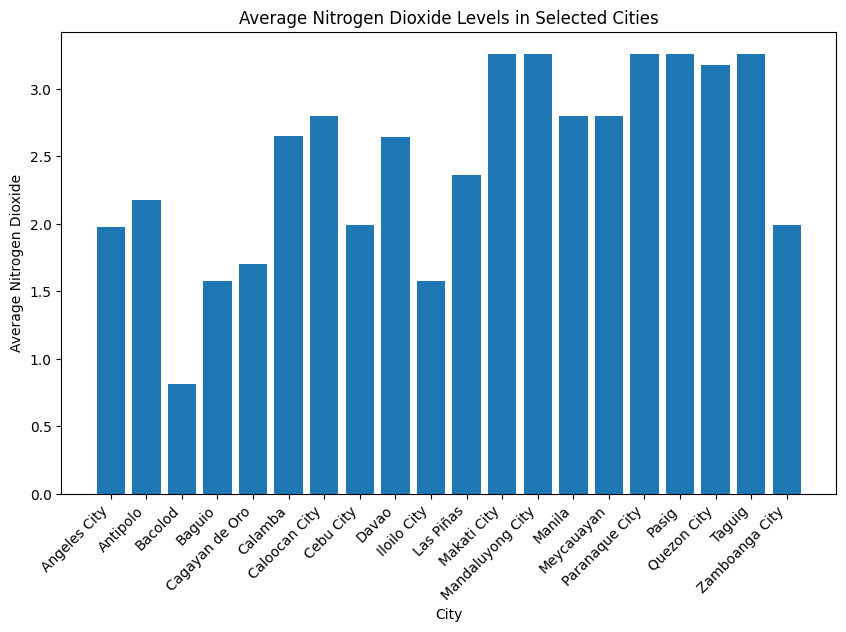

In [11]:


# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_NO2= 'components.no2'
pollutant_NO2_rename = 'Nitrogen Dioxide'
filtered_df.loc[:,pollutant_NO2] = np.log(filtered_df[pollutant_NO2] + 1)
# Group data by city and calculate the average pollutant level
average_NO2 = filtered_df.groupby('city_name')[pollutant_NO2].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_NO2.index, average_NO2.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_NO2_rename}')
plt.title(f'Average {pollutant_NO2_rename} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

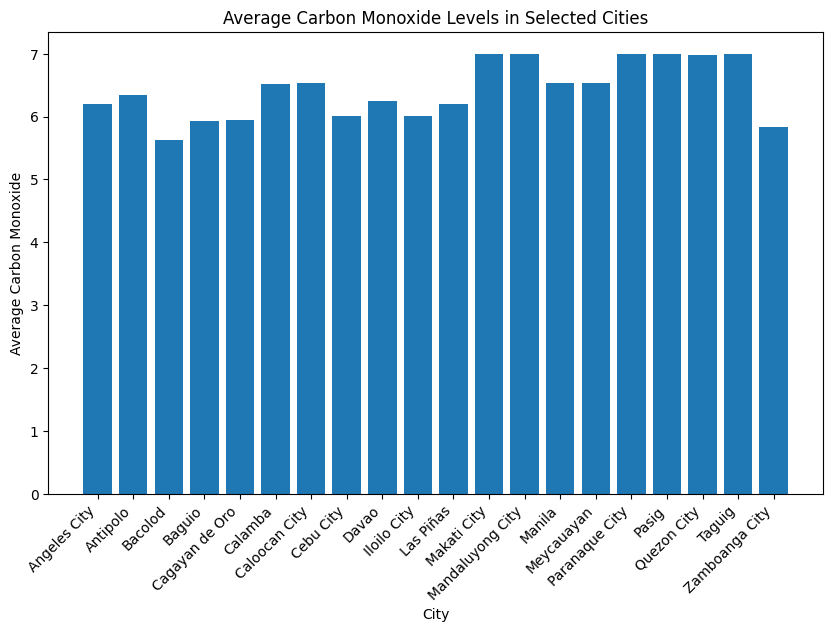

In [12]:
# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_CO= 'components.co'
pollutant_CO_rename = 'Carbon Monoxide'
filtered_df.loc[:,pollutant_CO] = np.log(filtered_df[pollutant_CO] + 1)
# Group data by city and calculate the average pollutant level
average_CO = filtered_df.groupby('city_name')[pollutant_CO].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_CO.index, average_CO.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_CO_rename}')
plt.title(f'Average {pollutant_CO_rename} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

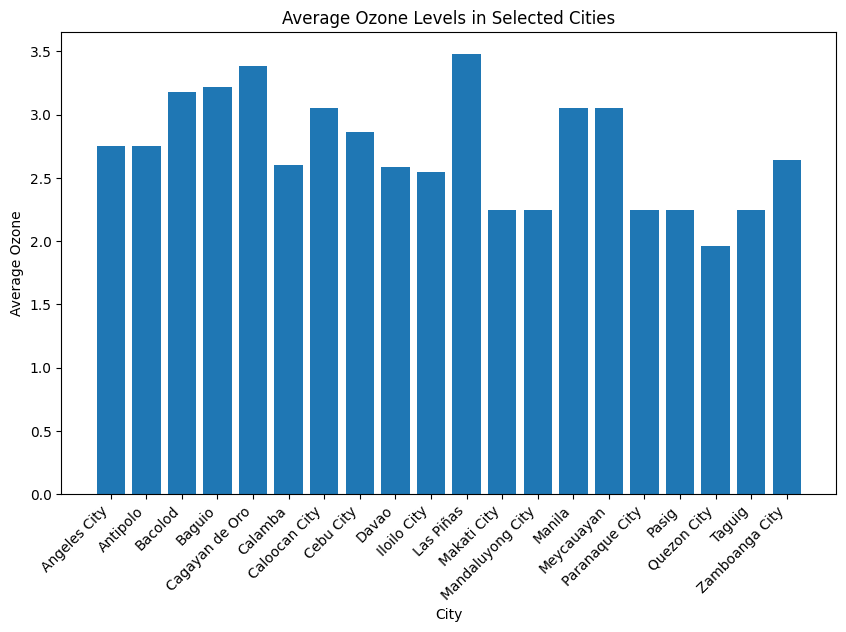

In [13]:
# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_O3= 'components.o3'
pollutant_O3_rename = 'Ozone'
filtered_df.loc[:,pollutant_O3] = np.log(filtered_df[pollutant_O3] + 1)
# Group data by city and calculate the average pollutant level
average_O3 = filtered_df.groupby('city_name')[pollutant_O3].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_O3.index, average_O3.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_O3_rename}')
plt.title(f'Average {pollutant_O3_rename} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

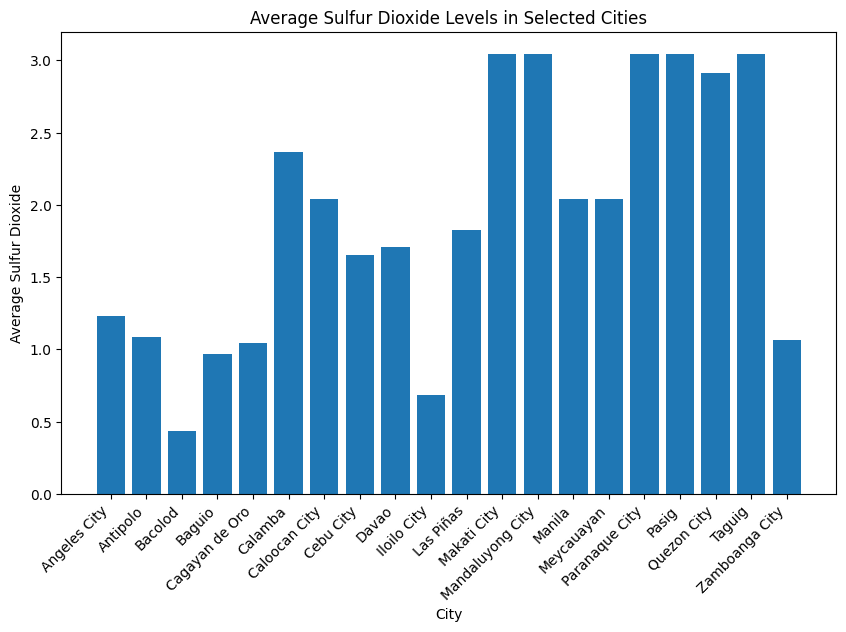

In [14]:


# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_SO2 = 'components.so2'
pollutant_SO2_rename = 'Sulfur Dioxide'
filtered_df.loc[:,pollutant_SO2] = np.log(filtered_df[pollutant_SO2] + 1)
# Group data by city and calculate the average pollutant level
average_SO2 = filtered_df.groupby('city_name')[pollutant_SO2].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_SO2.index, average_SO2.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_SO2_rename}')
plt.title(f'Average {pollutant_SO2_rename} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

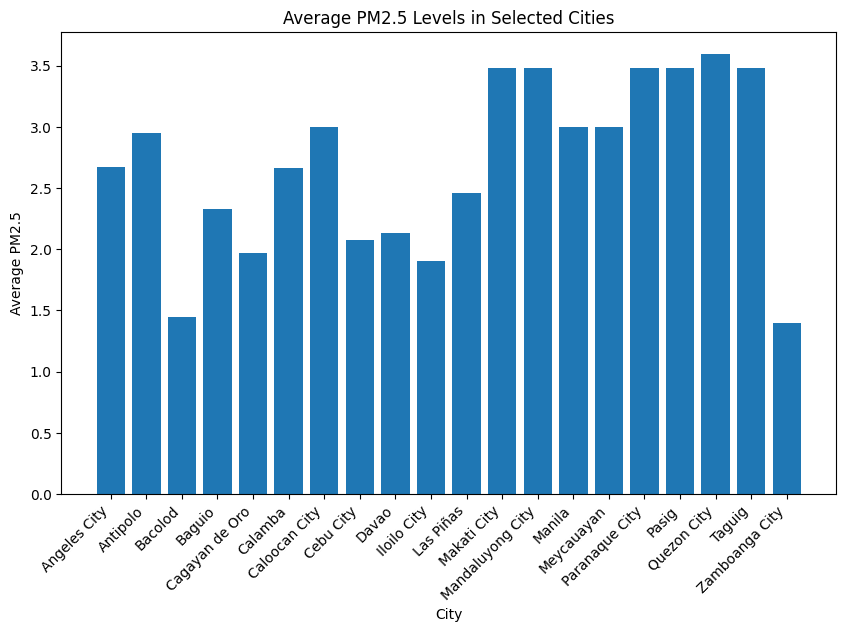

In [15]:


# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_PM2_5= 'components.pm2_5'
pollutant_PM2_5_rename = 'PM2.5'
filtered_df.loc[:,pollutant_PM2_5] = np.log(filtered_df[pollutant_PM2_5] + 1)
# Group data by city and calculate the average pollutant level
average_PM2_5 = filtered_df.groupby('city_name')[pollutant_PM2_5].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_PM2_5.index, average_PM2_5.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_PM2_5_rename}')
plt.title(f'Average {pollutant_PM2_5_rename} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

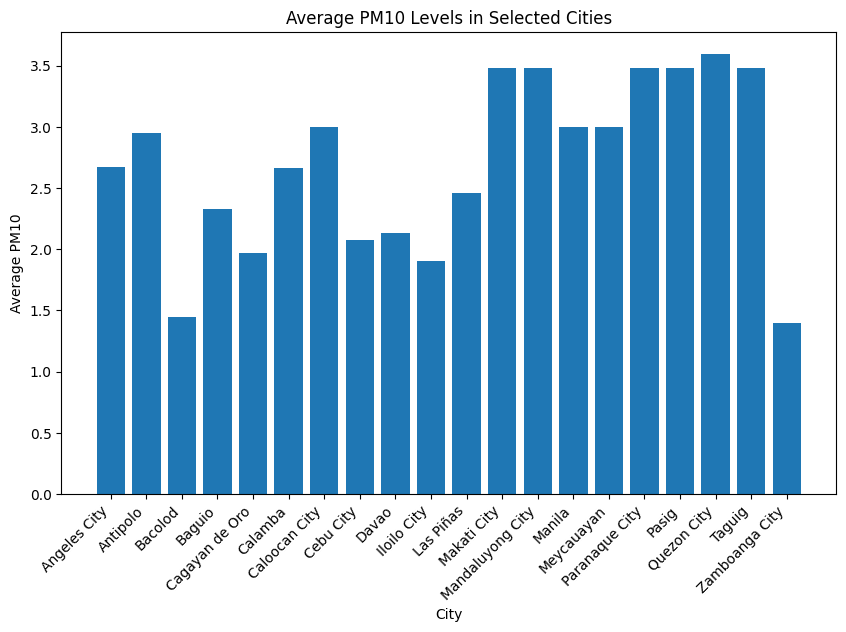

In [16]:


# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_PM10= 'components.pm10'
# Rename columns for readability
pollutant_PM10_rename = 'PM10'
filtered_df.loc[:,pollutant_PM10] = np.log(filtered_df[pollutant_PM10] + 1)
# Group data by city and calculate the average pollutant level
average_PM10 = filtered_df.groupby('city_name')[pollutant_PM2_5].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_PM10.index, average_PM10.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_PM10_rename}')
plt.title(f'Average {pollutant_PM10_rename} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

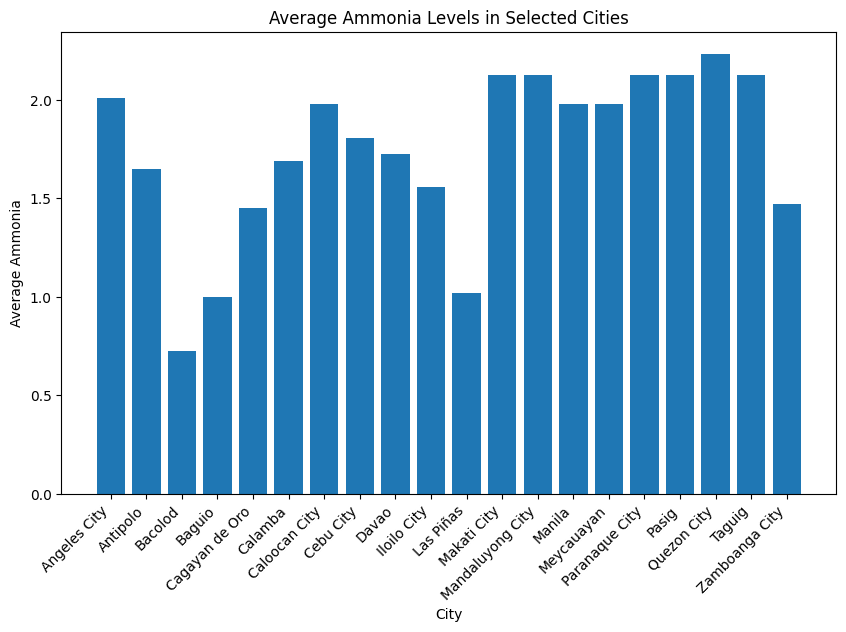

In [17]:


# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_NH3= 'components.nh3'
pollutant_NH3_rename = 'Ammonia'
filtered_df.loc[:,pollutant_NH3] = np.log(filtered_df[pollutant_NH3] + 1)
# Group data by city and calculate the average pollutant level
average_NH3 = filtered_df.groupby('city_name')[pollutant_NH3].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_NH3.index, average_NH3.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_NH3_rename}')
plt.title(f'Average {pollutant_NH3_rename} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()